In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv('911.csv')
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


In [4]:
#top 5 places with the highest 911 calls
data['zip'].value_counts().head()

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

In [5]:
#No of places
len(data['zip'].unique())

139

In [6]:
#top 5 townships with the highest 911 calls
data['twp'].value_counts().head()

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

In [7]:
# No of townships
len(data['twp'].unique())


69

In [8]:
#creating a new colums that contains the reason behind the 911 calls
def split_this(st):
    x = st.split(':')
    return x[0]
data['reason'] = data['title'].apply(split_this)

data['reason'].value_counts()


EMS        161441
Traffic    116065
Fire        48919
Name: reason, dtype: int64

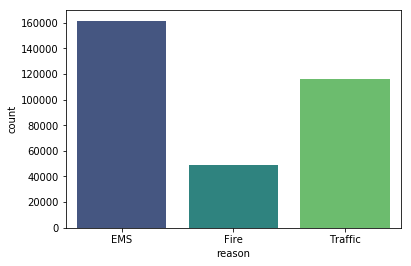

In [9]:
sns.countplot(x='reason',data=data,palette='viridis')

In [10]:
#changin the datestamp to datetime 
#data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [11]:
#data['timeStamp']

In [12]:
#creating a new column for the hour
def get_hour(x):
    return x.split()[1].split(":")[0]

data['Hour'] = data['timeStamp'].apply(get_hour)

In [13]:
data['Hour'].value_counts().head()

17    21527
16    21302
15    20733
14    19833
12    19588
Name: Hour, dtype: int64

In [14]:
#more 911 calls are at 1600 1700

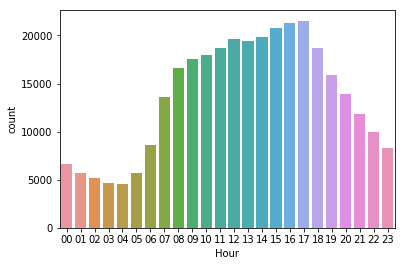

In [15]:
sns.countplot(x='Hour', data = data)

In [16]:
#we get less calls in the night as compared to the calls in day.

In [17]:
#similarly 
#creating a new column for the hour
def get_month(x):
    return x.split()[0].split("-")[1]

data['mnth'] = data['timeStamp'].apply(get_month)

In [18]:
data['mnth'].value_counts().head()

01    37824
03    34987
12    33019
02    32828
10    24113
Name: mnth, dtype: int64

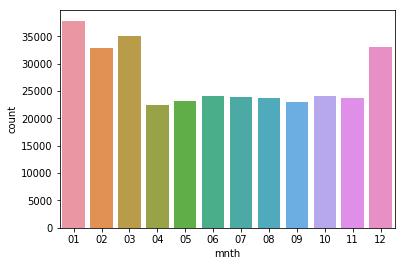

In [19]:
sns.countplot(x=data['mnth'],data=data)

In [20]:
#we get more call in the winter season 
# one cause may be due to the weather as more accidents happends in the winter
# due to the heavy snowfall.

In [21]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
#converting the timestamp as the datetime object
def get_weekday(x):
    return x.dayofweek


In [22]:
#now same for the days

data['weekdays'] = data['timeStamp'].apply(get_weekday)

weekday = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}

data['weekdays'] = data['weekdays'].map(weekday)
    

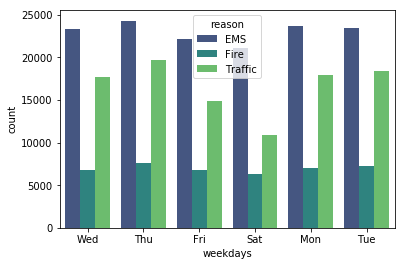

In [23]:
sns.countplot(x='weekdays',data=data,hue=data['reason'],palette='viridis')


In [24]:
#we don't have the plot for sunday

In [33]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'reason', 'Hour', 'mnth', 'weekdays'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 13 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null datetime64[ns]
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
reason       326425 non-null object
Hour         326425 non-null object
mnth         326425 non-null object
weekdays     279451 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 32.4+ MB


In [38]:
bymonth = data.groupby(data['mnth']).count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,weekdays
mnth,,,,,,,,,,,,
01,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,32108
02,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,27614
03,34987,34987,34987,31070,34987,34987,34973,34987,34987,34987,34987,30674
04,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,19255
05,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,19555


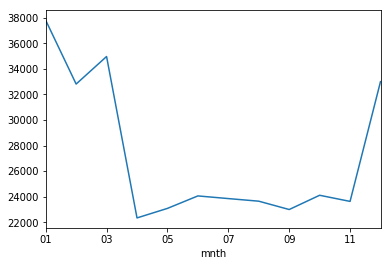

In [39]:
bymonth['twp'].plot()

In [40]:
#plot represting call per month

In [54]:
dayHour = data.groupby(by=['weekdays','Hour']).count()['reason'].unstack()
dayHour.head()

Hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
weekdays,,,,,,,,,,,,,,,,,,,,,
Fri,1130,999,908,767,742,788,957,1295,1674,2132,...,2643,2563,2529,2525,2477,2320,2074,1839,1579,1469
Mon,842,698,625,598,634,858,1386,2269,2853,2764,...,2937,3149,3335,3286,2918,2283,1960,1660,1329,1025
Sat,1159,1026,955,800,717,736,880,1196,1492,1849,...,2276,2170,2200,2234,2179,2067,1753,1536,1235,1177
Thu,896,789,701,644,633,786,1286,2087,2487,2570,...,3290,3562,3726,3596,2858,2562,2205,1916,1765,1396
Tue,805,738,620,626,560,798,1382,2319,2751,2744,...,3095,3211,3413,3435,2782,2296,2064,1682,1422,1103


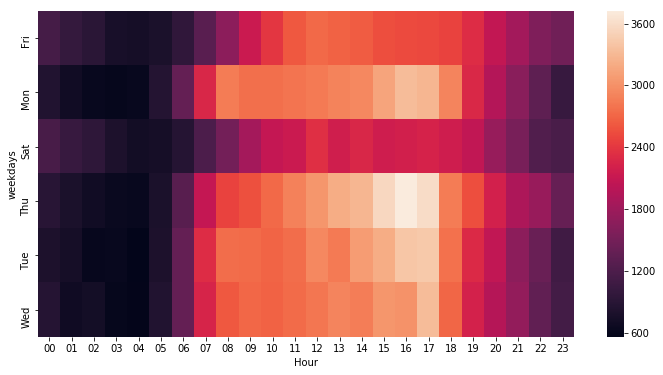

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

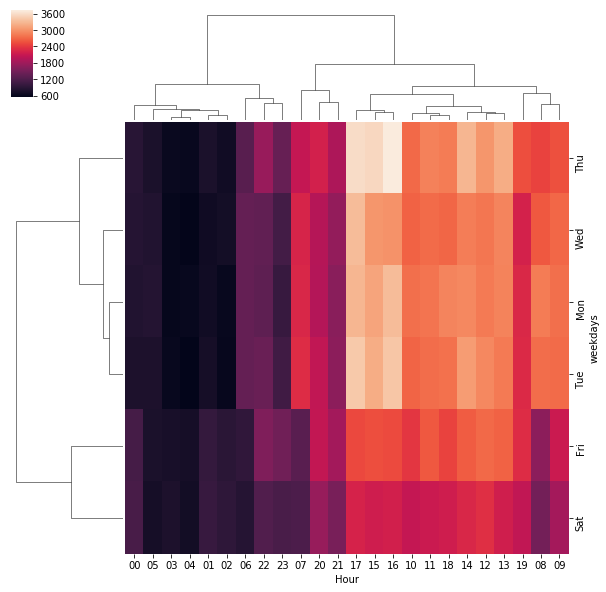

In [57]:
sns.clustermap(dayHour)